In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout

In [2]:
# Load the CSV file (update the file path as needed)
file_path = "Table.csv"
df = pd.read_csv(file_path)

In [3]:
# Standardizing the names in the provided list
standard_names = {
    "Rollett": "Rollett", "Ma": "Ma", "Wong": "Wong", "Sun": "Sun",
    "Taheri-Mousavi": "Taheri-Mousavi", "Webler": "Webler", "Narra": "Narra",
    "Oskay": "Oskay", "Lewandowski": "Lewandowski", "Ghosh": "Ghosh",
    "Mahadevan & Karve": "Mahadevan & Karve", "SWRI": "SWRI", "Green": "Green"
}

In [4]:
def clean_name(name):
    name = str(name).strip().replace("\n", " ")  # Remove extra spaces and newlines
    for key in standard_names.keys():
        if key.lower() in name.lower():
            return standard_names[key]
    return name  # Return as is if no match

In [5]:
# Convert all values to strings and handle missing values
df = df.fillna("")

In [6]:
donors = df.iloc[:, 0].astype(str).apply(clean_name)
recipients = df.iloc[:, 1].astype(str).apply(lambda x: [clean_name(name) for name in x.split("\n") if name.strip()])

In [7]:
# Create a weighted adjacency graph
G_weighted = nx.DiGraph()
weighted_edges = {}
for donor, rec_list in zip(donors, recipients):
    for recipient in rec_list:
        if donor and recipient:  # Avoid empty nodes
            weighted_edges[(donor, recipient)] = weighted_edges.get((donor, recipient), 0) + 1

In [8]:
# Add weighted edges to graph
for (donor, recipient), weight in weighted_edges.items():
    G_weighted.add_edge(donor, recipient, weight=weight)


In [9]:
# Generate the weighted adjacency matrix
adj_matrix = nx.to_pandas_adjacency(G_weighted, dtype=int)
print("Weighted Adjacency Matrix:")
display(adj_matrix)

Weighted Adjacency Matrix:


,Ma,Lewandowski,SWRI,Rollett,Narra,Oskay,Ghosh,Sun,Taheri-Mousavi,Webler
Ma,2,0,0,0,0,0,0,0,0,0
Lewandowski,0,0,1,1,0,0,0,0,0,0
SWRI,0,0,0,0,0,0,0,0,0,0
Rollett,1,1,0,0,0,0,1,0,0,2
Narra,0,0,1,1,0,0,0,0,0,0
Oskay,0,0,0,0,0,0,1,0,0,0
Ghosh,0,0,0,0,0,0,0,0,0,0
Sun,1,0,0,1,0,0,0,0,1,0
Taheri-Mousavi,3,0,0,1,0,0,1,1,0,0
Webler,0,0,0,0,0,0,2,0,0,0


In [10]:
# Plot force-directed weighted graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_weighted, seed=42, k=0.5)  # Force-directed layout
edges = G_weighted.edges(data=True)
weights = [d['weight'] for _, _, d in edges]

<Figure size 1200x800 with 0 Axes>

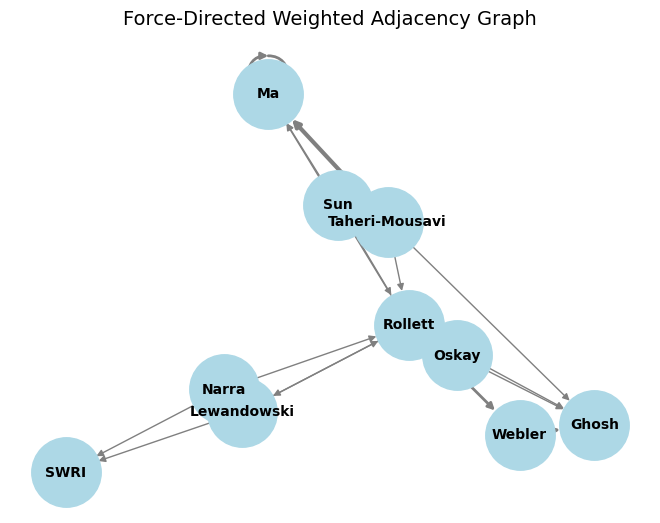

In [11]:
nx.draw(G_weighted, pos, with_labels=True, node_size=2500, node_color="lightblue", edge_color="gray", font_size=10, font_weight="bold", arrows=True, width=weights)
plt.title("Force-Directed Weighted Adjacency Graph", fontsize=14)
plt.show()

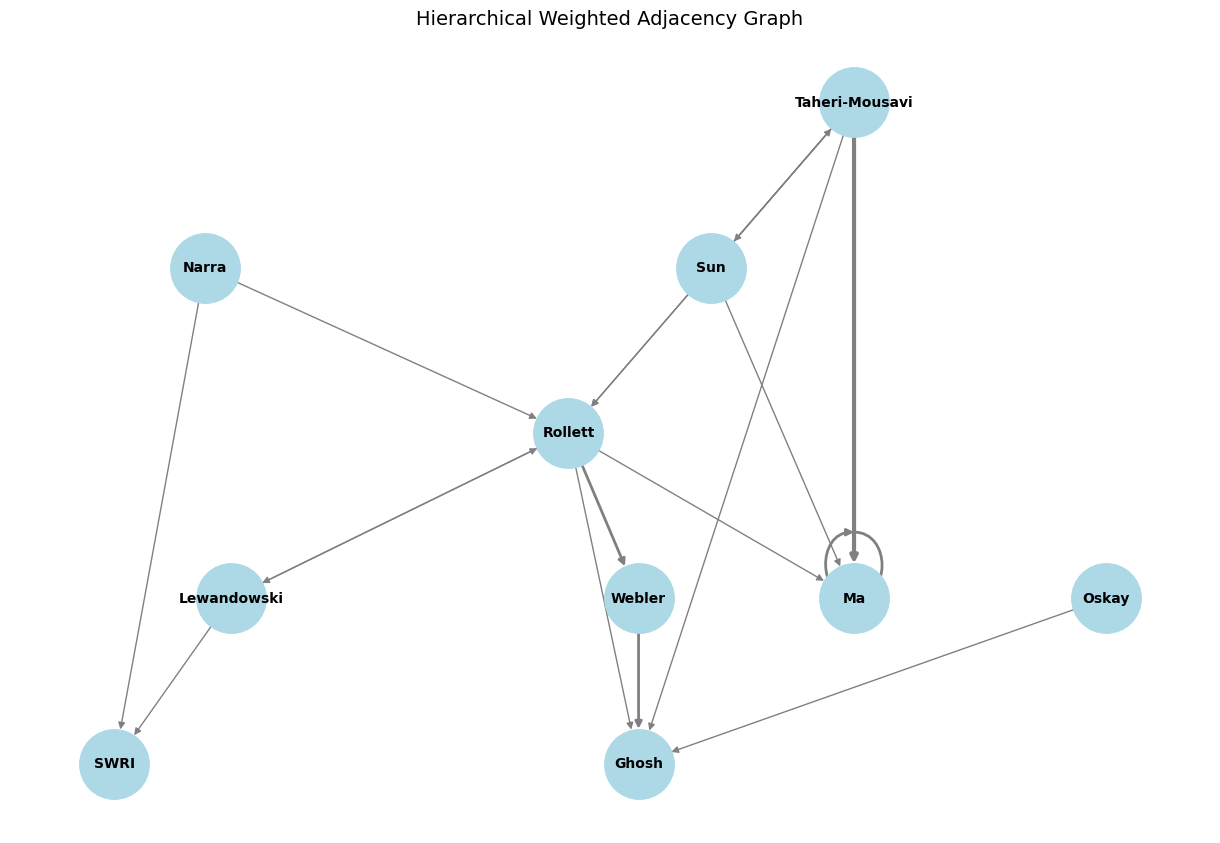

In [12]:
# Plot hierarchical weighted graph
plt.figure(figsize=(12, 8))
pos_hierarchy = graphviz_layout(G_weighted, prog="dot")
nx.draw(G_weighted, pos_hierarchy, with_labels=True, node_size=2500, node_color="lightblue", edge_color="gray", font_size=10, font_weight="bold", arrows=True, width=weights)
plt.title("Hierarchical Weighted Adjacency Graph", fontsize=14)
plt.show()